In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Data/my_PJME_MW.csv', index_col=[0], parse_dates=[0])

In [3]:
data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [4]:
data_w = data.resample('W').mean()

In [5]:
data_w.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-06,32392.160839,2002.0,1.000000,3.517483,1.0,3.517483,1.0,3.517483,11.58042,0.160839,0.000000,0.167832
2002-01-13,31487.386905,2002.0,1.000000,10.000000,1.0,10.000000,2.0,3.000000,11.50000,0.000000,0.000000,0.000000
2002-01-20,31452.880952,2002.0,1.000000,17.000000,1.0,17.000000,3.0,3.000000,11.50000,0.000000,0.142857,0.000000
2002-01-27,30141.529762,2002.0,1.000000,24.000000,1.0,24.000000,4.0,3.000000,11.50000,0.142857,0.000000,0.142857
2002-02-03,29196.488095,2002.0,1.428571,17.714286,1.0,31.000000,5.0,3.000000,11.50000,0.000000,0.000000,0.000000


In [6]:
data_w = data_w.drop('hour', axis=1)

In [8]:
data_w = data_w.drop('dayofweek', axis=1)

In [9]:
data_w = data_w.drop('year', axis=1)

In [10]:
data_w = data_w.drop('dayofmonth', axis=1)
data_w = data_w.drop('dayofyear', axis=1)

In [11]:
data_w.head()

,PJME_MW,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,
2002-01-06,32392.160839,1.000000,1.0,1.0,0.160839,0.000000,0.167832
2002-01-13,31487.386905,1.000000,1.0,2.0,0.000000,0.000000,0.000000
2002-01-20,31452.880952,1.000000,1.0,3.0,0.000000,0.142857,0.000000
2002-01-27,30141.529762,1.000000,1.0,4.0,0.142857,0.000000,0.142857
2002-02-03,29196.488095,1.428571,1.0,5.0,0.000000,0.000000,0.000000


In [12]:
data_w = data_w.drop('is_next_holiday', axis=1)
data_w = data_w.drop('is_prev_holiday', axis=1)

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [16]:
scaler = StandardScaler()
tsne_ = TSNE(n_components=2, random_state=42)

X = data_w.values
X_scaled = scaler.fit_transform(X)
X_tsne = tsne_.fit_transform(X_scaled)

In [17]:
import seaborn as sns

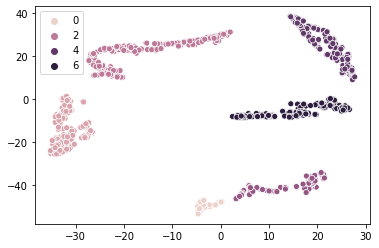

In [18]:
cluster = DBSCAN(eps=3, leaf_size=15)
X_clusters = cluster.fit_predict(X_tsne)

sns.scatterplot(X_tsne[:, 0], X_tsne[:, 1], hue=X_clusters)

In [20]:
data_w['cluster'] = X_clusters
data_w.head()

,PJME_MW,month,quarter,weekofyear,is_holiday,cluster
Date,,,,,,
2002-01-06,32392.160839,1.000000,1.0,1.0,0.160839,0
2002-01-13,31487.386905,1.000000,1.0,2.0,0.000000,1
2002-01-20,31452.880952,1.000000,1.0,3.0,0.000000,1
2002-01-27,30141.529762,1.000000,1.0,4.0,0.142857,0
2002-02-03,29196.488095,1.428571,1.0,5.0,0.000000,1


In [21]:
from sklearn.decomposition import PCA

In [22]:
pca_ = PCA(n_components=2, svd_solver='full')

X_pca = pca_.fit_transform(X_scaled)

In [24]:
data_w['pca1'] = X_pca[:, 0]
data_w['pca2'] = X_pca[:, 1]

In [25]:
data_w['diff'] = data_w['PJME_MW'].diff()
data_w.head()

,PJME_MW,month,quarter,weekofyear,is_holiday,cluster,pca1,pca2,diff
Date,,,,,,,,,
2002-01-06,32392.160839,1.000000,1.0,1.0,0.160839,0,-2.456786,1.645752,NaN
2002-01-13,31487.386905,1.000000,1.0,2.0,0.000000,1,-2.657596,-0.398610,-904.773934
2002-01-20,31452.880952,1.000000,1.0,3.0,0.000000,1,-2.618849,-0.405877,-34.505952
2002-01-27,30141.529762,1.000000,1.0,4.0,0.142857,0,-2.335608,1.006388,-1311.351190
2002-02-03,29196.488095,1.428571,1.0,5.0,0.000000,1,-2.434401,-0.837669,-945.041667


In [26]:
data_w['log'] = np.log(data_w['PJME_MW'])

In [29]:
data_w['log_quot'] = 0
log_quot = data_w['log'].iloc[1:].values/data_w['log'].iloc[:-1].values
data_w['log_quot'].iloc[1:] = log_quot

In [30]:
data_w.head()

,PJME_MW,month,quarter,weekofyear,is_holiday,cluster,pca1,pca2,diff,log,log_quot
Date,,,,,,,,,,,
2002-01-06,32392.160839,1.000000,1.0,1.0,0.160839,0,-2.456786,1.645752,NaN,10.385672,0.000000
2002-01-13,31487.386905,1.000000,1.0,2.0,0.000000,1,-2.657596,-0.398610,-904.773934,10.357342,0.997272
2002-01-20,31452.880952,1.000000,1.0,3.0,0.000000,1,-2.618849,-0.405877,-34.505952,10.356246,0.999894
2002-01-27,30141.529762,1.000000,1.0,4.0,0.142857,0,-2.335608,1.006388,-1311.351190,10.313659,0.995888
2002-02-03,29196.488095,1.428571,1.0,5.0,0.000000,1,-2.434401,-0.837669,-945.041667,10.281804,0.996911


In [31]:
data_w['rolling4'] = data_w['PJME_MW'].rolling(window=4).mean()

In [32]:
data_w.head()

,PJME_MW,month,quarter,weekofyear,is_holiday,cluster,pca1,pca2,diff,log,log_quot,rolling4
Date,,,,,,,,,,,,
2002-01-06,32392.160839,1.000000,1.0,1.0,0.160839,0,-2.456786,1.645752,NaN,10.385672,0.000000,NaN
2002-01-13,31487.386905,1.000000,1.0,2.0,0.000000,1,-2.657596,-0.398610,-904.773934,10.357342,0.997272,NaN
2002-01-20,31452.880952,1.000000,1.0,3.0,0.000000,1,-2.618849,-0.405877,-34.505952,10.356246,0.999894,NaN
2002-01-27,30141.529762,1.000000,1.0,4.0,0.142857,0,-2.335608,1.006388,-1311.351190,10.313659,0.995888,31368.489615
2002-02-03,29196.488095,1.428571,1.0,5.0,0.000000,1,-2.434401,-0.837669,-945.041667,10.281804,0.996911,30569.571429


In [34]:
def exponential_smoothing(series, alpha):
    result = [series[0]] 
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

data_w['exp_001'] = exponential_smoothing(data_w['PJME_MW'], 0.01)
data_w['exp_003'] = exponential_smoothing(data_w['PJME_MW'], 0.03)
data_w['exp_005'] = exponential_smoothing(data_w['PJME_MW'], 0.05)
data_w['exp_007'] = exponential_smoothing(data_w['PJME_MW'], 0.07)
data_w['exp_009'] = exponential_smoothing(data_w['PJME_MW'], 0.09)

In [38]:
p=8
for i in range(1, p+1):
    data_w['t'+str(i)] = 0.0
    data_w['t'+str(i)].values[i:] = data_w['PJME_MW'].values[:-i]

In [40]:
for i in range(1, p+1):
    data_w['diff_t'+str(i)] = 0.0
    data_w['diff_t'+str(i)].values[i:] = data_w['diff'].values[:-i]

In [44]:
data_w = data_w.fillna(0)

In [46]:
h=4
scl = StandardScaler()
target = data_w['PJME_MW'].values[h+p:].reshape((-1, 1))
scaled_target = scl.fit_transform(target)
scaled_target.shape

(854, 1)

In [47]:
scl_x = StandardScaler()

X_r = data_w.iloc[p:-h, :].values
X_r_scaled = scl_x.fit_transform(X_r.astype('float64'))
X_r_scaled.shape

(854, 33)

In [49]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import f_regression

In [50]:
skb = SelectKBest(f_regression, k=5)

X_skb = skb.fit_transform(X_r_scaled, scaled_target.ravel())
list_param_skb = np.where(skb.get_support())[0]
list_param_skb

array([ 0,  7,  9, 23, 24], dtype=int64)

In [51]:
sp = SelectPercentile(f_regression, percentile=10)

X_sp = sp.fit_transform(X_r_scaled, scaled_target.ravel())
list_param_sp = np.where(sp.get_support())[0]
list_param_sp

array([ 0,  9, 23, 24], dtype=int64)

In [53]:
model = GradientBoostingRegressor(max_depth=5, random_state=42, n_estimators=100)
model.fit(X_r_scaled, scaled_target.ravel())
sfm = SelectFromModel(model, max_features=5)
X_sfm = sfm.fit_transform(X_r_scaled, scaled_target.ravel())
list_param_sfm = np.where(sfm.get_support())[0]
list_param_sfm

array([ 1,  3,  6,  9, 24], dtype=int64)